<a href="https://colab.research.google.com/github/shubhanshu1995/Deep-Learning-with-Keras/blob/master/Cats_%26_Dogs_Image_Classifier_with_CNN_and_Fine_tuning_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train_path = '/content/gdrive/My Drive/Colab Notebooks/cats-and-dogs/train'
valid_path = '/content/gdrive/My Drive/Colab Notebooks/cats-and-dogs/valid'
test_path = '/content/gdrive/My Drive/Colab Notebooks/cats-and-dogs/test'

In [164]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224), classes=['dog','cat'],batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224), classes=['dog','cat'],batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224), classes=['dog','cat'],batch_size=10)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [0]:
#plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
  if type(ims[0]) is np.ndarray:
    ims = np.array(ims).astype(np.uint8)
    if (ims.shape[-1]!=3):
      ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else  len(ims)//rows + 1
    for i in range(len(ims)):
      sp = f.add_subplot(rows, cols, i+1)
      sp.axis('Off')
      if titles is not None:
        sp.set_title(titles[i], fontsize=16)
      plt.imshow(ims[i], interpolation=None if interp else 'none')

In [0]:
imgs, labels = next(train_batches)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


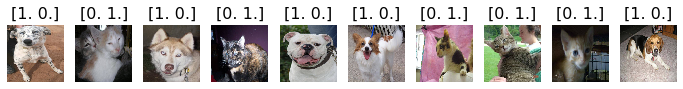

In [167]:
plots(imgs,titles=labels)

# **Build and train CNN**

In [168]:
from keras import backend
print(backend.image_data_format())

channels_last


In [0]:
model = Sequential([
                    Conv2D(32, (3, 3), activation='relu',input_shape=(224,224,3)),
                    Flatten(),
                    Dense(2, activation='softmax')
])

In [0]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [171]:
model.fit_generator(train_batches,steps_per_epoch=4,
                    validation_data=valid_batches, validation_steps=4, epochs=10, verbose=2)

Epoch 1/10
 - 1s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 9/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 10/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000


# **Predict**

In [0]:
test_imgs, test_labels = next(test_batches)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


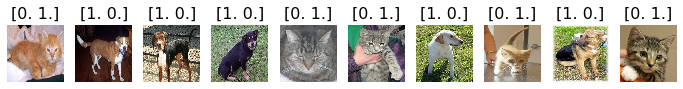

In [173]:
plots(test_imgs,titles=test_labels)

In [174]:
test_labels = test_labels[:,0]
test_labels

array([0., 1., 1., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)

In [0]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [176]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [0]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 5]
 [0 5]]


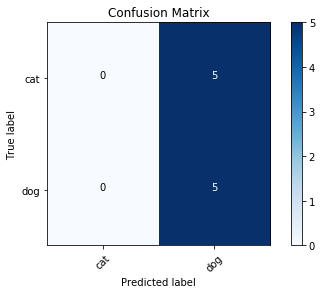

In [179]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

#**Build Fine-tuned VGG16 model**

In [0]:
vgg16_model = keras.applications.vgg16.VGG16()

In [181]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [182]:
type(vgg16_model)

keras.engine.training.Model

## **The last output layer of VGG16 model classify images into 1000 categories. We don't want that. So we don't add the last dense layer**

In [0]:
new_model = Sequential()
for layer in vgg16_model.layers[:-1]:
  new_model.add(layer)

In [184]:
new_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

# **Freezing a layer meaning that we are excluding it from future training. Weights will never be updated. This is useful for the purpose of fine tuning the model.**

In [0]:
for layer in new_model.layers:
    layer.trainable = False        

In [0]:
new_model.add(Dense(2,activation='softmax'))

In [187]:
new_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

# **Train the fine-tuned VGG16 model**

In [0]:
new_model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [189]:
new_model.fit_generator(train_batches, steps_per_epoch=4, 
                    validation_data=valid_batches, validation_steps=4, epochs=10, verbose=2)

Epoch 1/10
 - 1s - loss: 1.8100 - acc: 0.5250 - val_loss: 1.0937 - val_acc: 0.5000
Epoch 2/10
 - 0s - loss: 1.3399 - acc: 0.5250 - val_loss: 0.8331 - val_acc: 0.4375
Epoch 3/10
 - 0s - loss: 0.8896 - acc: 0.6250 - val_loss: 0.6917 - val_acc: 0.5625
Epoch 4/10
 - 0s - loss: 0.6047 - acc: 0.7250 - val_loss: 0.6136 - val_acc: 0.6250
Epoch 5/10
 - 0s - loss: 0.4016 - acc: 0.8250 - val_loss: 0.5505 - val_acc: 0.7500
Epoch 6/10
 - 0s - loss: 0.2699 - acc: 0.8750 - val_loss: 0.4915 - val_acc: 0.8125
Epoch 7/10
 - 0s - loss: 0.1767 - acc: 0.9500 - val_loss: 0.4291 - val_acc: 0.8750
Epoch 8/10
 - 0s - loss: 0.1327 - acc: 0.9750 - val_loss: 0.3801 - val_acc: 0.8750
Epoch 9/10
 - 0s - loss: 0.0990 - acc: 0.9750 - val_loss: 0.3440 - val_acc: 0.8750
Epoch 10/10
 - 0s - loss: 0.0730 - acc: 0.9750 - val_loss: 0.3164 - val_acc: 0.8750


# **Old Model Results**

In [190]:
model.fit_generator(train_batches, steps_per_epoch=4, 
                   validation_data=valid_batches, validation_steps=4, epochs=10, verbose=2)

Epoch 1/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 9/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 10/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000


## **Predict using fine-tuned VGG16 model**

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


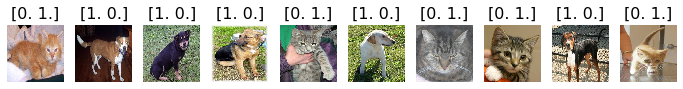

In [191]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [192]:
test_labels = test_labels[:,0]
test_labels

array([0., 1., 1., 1., 0., 1., 0., 0., 1., 0.], dtype=float32)

In [0]:
predictions = new_model.predict_generator(test_batches, steps=1, verbose=0)

In [0]:
new_cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[5 0]
 [0 5]]


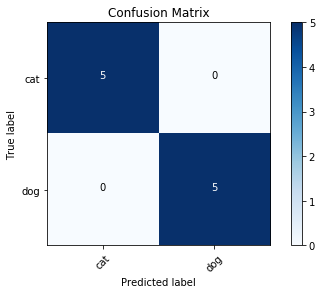

In [195]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(new_cm, cm_plot_labels, title='Confusion Matrix')

# **Old Model Results**

Confusion matrix, without normalization
[[0 5]
 [0 5]]


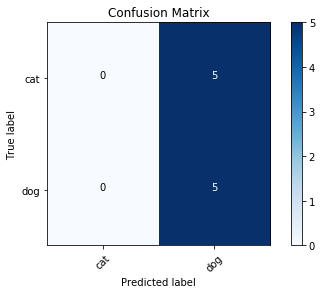

In [196]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')